<a href="https://colab.research.google.com/github/anumit-web/python-interview-2024/blob/main/machine%20learning/Unsupervised_Learning_clustering_type_iris_flower_clustering_Gaussian_mixture_model_(GMM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python interview preparation

# Machine Learning

# Supervised Learning

# Support Vector Machines (SVM)

# Multiple datasets example

# Chapter 1

---
---

I'll create a comprehensive example that demonstrates SVM classification with different datasets and scenarios

This comprehensive example demonstrates SVM classification in various scenarios:

1. Half-Moons Dataset:
   - Nonlinear classification problem
   - Uses RBF kernel
   - Shows how SVM handles curved decision boundaries




2. Concentric Circles Dataset:
   - Another nonlinear classification problem
   - Implements GridSearchCV for hyperparameter tuning
   - Demonstrates the importance of kernel selection




3. Breast Cancer Dataset:
   - Real-world example with multiple features
   - Compares different kernel types (linear, RBF, polynomial)
   - Includes feature importance visualization




4. Custom Dataset with Noise:
   - Shows how different C values affect the decision boundary
   - Demonstrates SVM's robustness to noise
   - Visualizes the impact of regularization




Key Features Demonstrated:
1. Data preprocessing with StandardScaler
2. Hyperparameter tuning with GridSearchCV
3. Various kernel functions
4. Decision boundary visualization
5. Feature importance analysis
6. Classification metrics and evaluation




Would you like me to:
1. Explain any particular aspect in more detail?
2. Add more examples with different datasets?
3. Demonstrate additional SVM features or parameters?


---

---

# Python Code

In [9]:
import numpy as np
import pandas as pd

In [10]:
import sys

print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [11]:
print("Hello, World!")

Hello, World!


# Python code

Example 1: Half-Moons Dataset Classification
--------------------------------------------------
Half-Moons Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



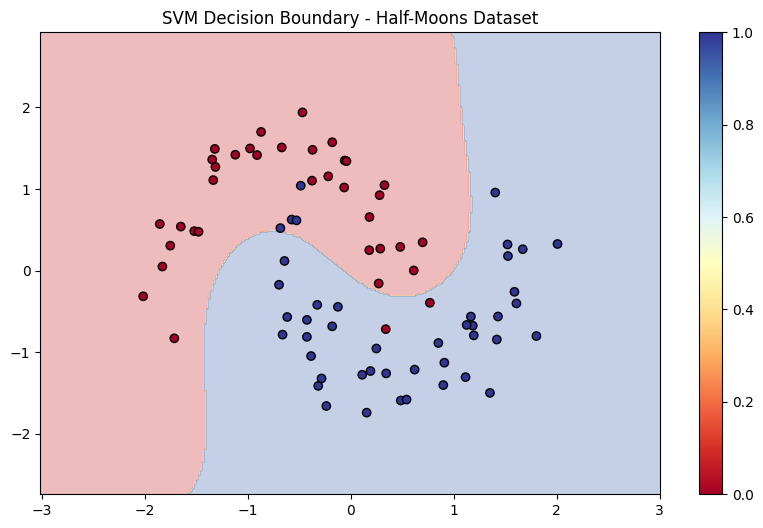


Example 2: Concentric Circles Dataset Classification
--------------------------------------------------
Best parameters: {'C': 1, 'gamma': 'scale'}

Concentric Circles Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



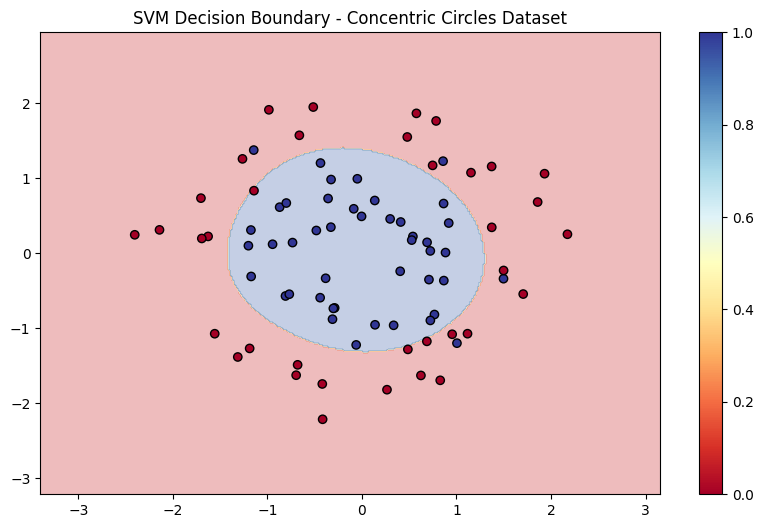


Example 3: Breast Cancer Dataset Classification
--------------------------------------------------

Results for LINEAR kernel:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Results for RBF kernel:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Results for POLY kernel:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

   

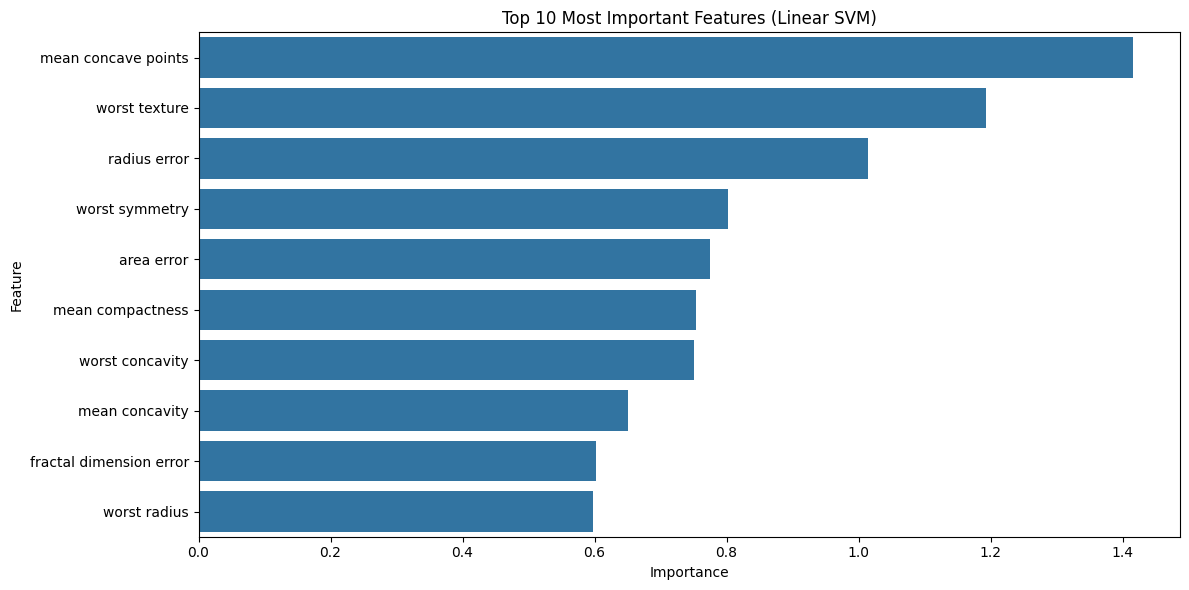


Example 4: Custom Dataset with Noise
--------------------------------------------------

Results for C=0.1:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        13
         1.0       0.91      0.91      0.91        11

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



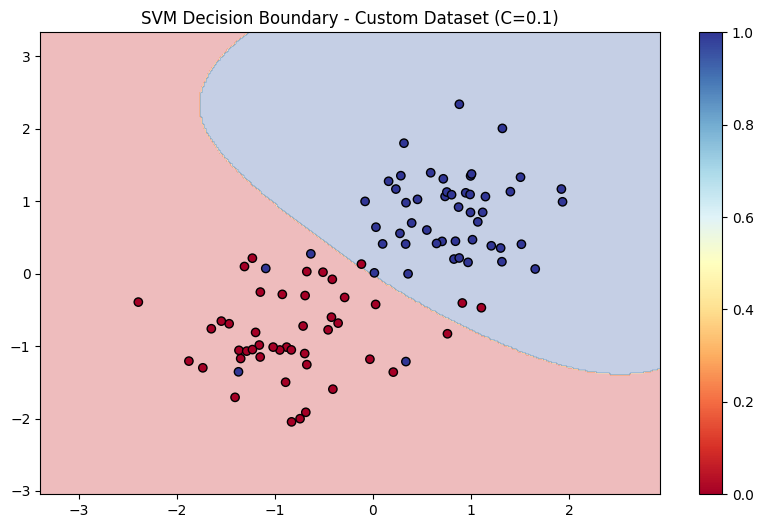


Results for C=1.0:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        13
         1.0       0.91      0.91      0.91        11

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



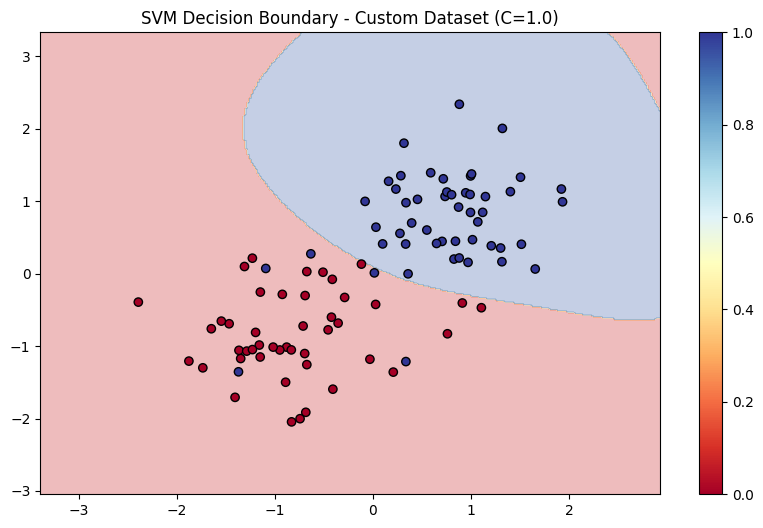


Results for C=10.0:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        13
         1.0       0.91      0.91      0.91        11

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



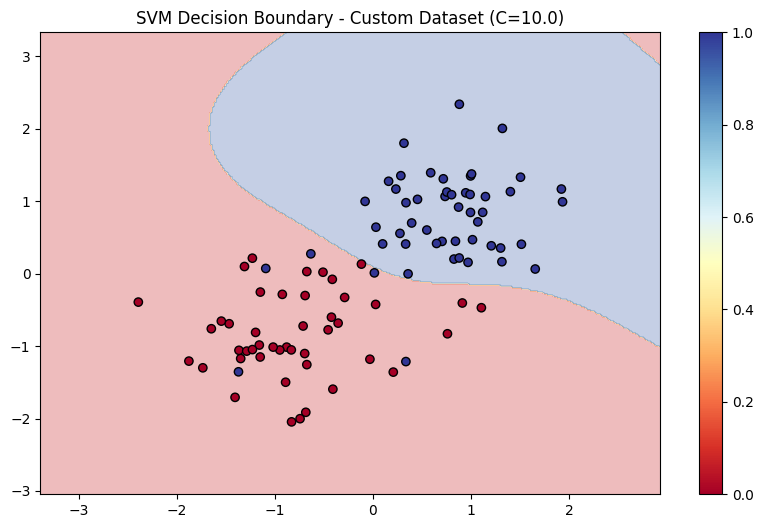

In [12]:


import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_moons, make_circles, load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_decision_boundary(X, y, model, title):
    """Helper function to plot decision boundaries"""
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y,
                         cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

# Example 1: Nonlinear Classification with Half-Moons Dataset
print("Example 1: Half-Moons Dataset Classification")
print("-" * 50)

# Generate half-moons dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel
svm_moons = SVC(kernel='rbf', C=1.0, random_state=42)
svm_moons.fit(X_train_scaled, y_train)

# Evaluate and plot
print("Half-Moons Classification Report:")
y_pred_moons = svm_moons.predict(X_test_scaled)
print(classification_report(y_test, y_pred_moons))
plot_decision_boundary(X_train_scaled, y_train, svm_moons,
                      'SVM Decision Boundary - Half-Moons Dataset')

# Example 2: Concentric Circles Dataset
print("\nExample 2: Concentric Circles Dataset Classification")
print("-" * 50)

# Generate concentric circles dataset
X_circles, y_circles = make_circles(n_samples=100, noise=0.15, factor=0.5,
                                  random_state=42)

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(
    X_circles, y_circles, test_size=0.2, random_state=42
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel and grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svm_circles = GridSearchCV(SVC(kernel='rbf', random_state=42),
                          param_grid, cv=5)
svm_circles.fit(X_train_scaled, y_train)

print("Best parameters:", svm_circles.best_params_)
print("\nConcentric Circles Classification Report:")
y_pred_circles = svm_circles.predict(X_test_scaled)
print(classification_report(y_test, y_pred_circles))
plot_decision_boundary(X_train_scaled, y_train, svm_circles,
                      'SVM Decision Boundary - Concentric Circles Dataset')

# Example 3: Breast Cancer Dataset (Real-world Example)
print("\nExample 3: Breast Cancer Dataset Classification")
print("-" * 50)

# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with different kernels
kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    svm_cancer = SVC(kernel=kernel, random_state=42)
    svm_cancer.fit(X_train_scaled, y_train)
    y_pred = svm_cancer.predict(X_test_scaled)
    results[kernel] = classification_report(y_test, y_pred)

# Print results for each kernel
for kernel, report in results.items():
    print(f"\nResults for {kernel.upper()} kernel:")
    print(report)

# Visualize feature importance for linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Create feature importance plot
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Importance': np.abs(svm_linear.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features (Linear SVM)')
plt.tight_layout()
plt.show()

# Example 4: Custom Dataset with Noise
print("\nExample 4: Custom Dataset with Noise")
print("-" * 50)

# Generate custom dataset with noise
np.random.seed(42)
n_samples = 100

# Generate two clusters with noise
X_custom = np.concatenate([
    np.random.normal(0, 1, (n_samples//2, 2)),
    np.random.normal(3, 1, (n_samples//2, 2))
])
y_custom = np.concatenate([
    np.zeros(n_samples//2),
    np.ones(n_samples//2)
])

# Add random noise points
noise_points = np.random.uniform(-1, 4, (20, 2))
noise_labels = np.random.randint(0, 2, 20)
X_custom = np.vstack([X_custom, noise_points])
y_custom = np.concatenate([y_custom, noise_labels])

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(
    X_custom, y_custom, test_size=0.2, random_state=42
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with different C values
C_values = [0.1, 1.0, 10.0]
for C in C_values:
    svm_custom = SVC(kernel='rbf', C=C, random_state=42)
    svm_custom.fit(X_train_scaled, y_train)
    y_pred = svm_custom.predict(X_test_scaled)

    print(f"\nResults for C={C}:")
    print(classification_report(y_test, y_pred))
    plot_decision_boundary(X_train_scaled, y_train, svm_custom,
                         f'SVM Decision Boundary - Custom Dataset (C={C})')